# Introduction
This comprehensive project delves into the intricacies of the TMDb (The Movie Database) movie dataset, comprising rich and diverse information on more than 10,000 movies. This dataset encompasses a wide array of attributes, including but not limited to revenue, budget, cast, release dates, and genres, providing a holistic view of the cinematic landscape.

The overarching objective of this analysis is to unearth meaningful trends and insights that shed light on the factors contributing to a movie's success. By meticulously examining metrics such as  revenue, budget, release_date, and genres, the goal is to discern the key characteristics that correlate most strongly with both the popularity and financial success of films. The exploration will be facilitated through the application of insightful visualizations, enabling a dynamic and intuitive understanding of the relationships inherent in the dataset.

Through this exploration, the project aspires to offer valuable insights to filmmakers, industry professionals, and enthusiasts alike, helping them navigate the complex landscape of factors influencing a movie's reception and financial performance. The use of data-driven analysis and visual representation aims to provide a robust foundation for decision-making and strategic planning in the dynamic realm of the film industry.


## <span style="font-size: 46px;color:green">Questions to be Answered</span>
### ***1.What movie holds the record for the highest profit of all time, and which movie has the lowest profit?***
### ***2.Which movie achieved the highest profit each year, and what is the total profit for every year?***
### ***3.Which movies make it to the top 10 with the highest budget of all time?***
### ***4.Which movie had the highest budget each year, and what is the total budget for every year?***
### ***5.Which genres were most frequently employed in movies spanning the period from 1960 to 2015?***
### ***6.Which cast members have been featured in the highest number of films?***
### ***7.Which director was most filmed?***
### ***8.Which production companies  were most filmed?***
### ***9.Which pairs of features in the dataset exhibit the strongest correlation?***


## Loading and Exploring the TMDb Movies Dataset

In [399]:
# Imports commonly used data analysis and visualization libraries:
# - pandas for working with DataFrames
# - numpy for numerical operations 
# - seaborn and matplotlib.pyplot for statistical data visualization
# - sns.set() sets some default style options for seaborn plots
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [400]:
df = pd.read_csv('data/tmdb_movies_data.csv')
# Read in the TMDb movie data CSV file and store it in a Pandas DataFrame called df
df.head()
# Display the first 5 rows of df using the head() method

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [401]:
# Prints information about the DataFrame including data types, non-null values, memory usage and more.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [402]:
# Counts the number of null values in each column of the DataFrame df
df.isnull().sum()


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

# Data Cleaning

In [403]:
# The 'duplicated()' function returns duplicate rows as True and others as False.  
# Using the 'sum()' function allows us to count the number of duplicate rows.
 
sum(df.duplicated())

1

In [404]:
#remove duplicate rows using 'drop_duplicates()' function

df.drop_duplicates(inplace=True)

In [405]:
sum(df.duplicated())

0

In [406]:
# Converts the 'release_date' column to datetime format.
df['release_date'] = pd.to_datetime(df['release_date'])

# df['release_date'].head()

In [407]:
#this will replace the value of '0' to NaN of columns given in the list
df[['budget','revenue']] = df[['budget','revenue']].replace(0,np.NaN)
print(df[['budget']].isna().sum())
#drop the rows that have NaN values in the budget and revenue columns
df.dropna(subset=['budget', 'revenue'], inplace=True)
print('After cleaning, we have {} rows'.format(df.shape[0]))

budget    5696
dtype: int64
After cleaning, we have 3854 rows


In [408]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [409]:
#Remove unused columns
del_col = ['imdb_id', 'homepage','tagline', 'keywords', 'overview','vote_average', 'budget_adj','revenue_adj']
df.drop(del_col, axis=1, inplace=True)
print('We have {} rows and {} columns' .format(df.shape[0], df.shape[1]))

We have 3854 rows and 13 columns


In [410]:
#Add Profit column to the dataset
df['profit'] = df['revenue']-df['budget']
df['profit'] = df['profit'].apply(np.int64)
df['budget'] = df['budget'].apply(np.int64)
df['revenue'] = df['revenue'].apply(np.int64)

In [411]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,release_year,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,2015,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,2015,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,2015,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,2015,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,2015,1316249360


In [412]:
print(df.isnull().sum())

id                       0
popularity               0
budget                   0
revenue                  0
original_title           0
cast                     4
director                 1
runtime                  0
genres                   0
production_companies    46
release_date             0
vote_count               0
release_year             0
profit                   0
dtype: int64


In [413]:
df.dtypes

id                               int64
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
release_year                     int64
profit                           int64
dtype: object

# Exploratory Data Analysis


In [414]:
def find_lowest_highest(data_frame, col_name):
    min_index = data_frame[col_name].idxmin()
    max_index = data_frame[col_name].idxmax()
    low  = pd.DataFrame(data_frame.loc[min_index,:])
    high = pd.DataFrame(data_frame.loc[max_index,:])
    print('Movie which has highest '+col_name+' : ', data_frame['original_title'][max_index])
    print('Movie which has lowest '+col_name+' : ', data_frame['original_title'][min_index])
    return pd.concat([high,low], axis=1)
    

In [415]:
def top_10(data_frame ,col_name,size=10):
    data_frame_sorted = pd.DataFrame(data_frame[col_name].sort_values(ascending=False))[:size]
    data_frame_sorted['original_title'] = data_frame['original_title']
    plt.figure(figsize=(12,6))
    avg = np.mean(data_frame[col_name]) 
    sns.barplot(x=col_name, y='original_title', data=data_frame_sorted, label=col_name)
    plt.axvline(avg, color='black', linestyle='--', label='mean')
    if (col_name == 'profit' or col_name == 'budget' or col_name == 'revenue'):
        plt.xlabel(col_name.capitalize() + ' (U.S Dolar)')
    else:
        plt.xlabel(col_name.capitalize())
    plt.ylabel('')
    plt.title('Top 10 Movies in: ' + col_name.capitalize())
    plt.legend()
   

In [416]:
from matplotlib import gridspec
# Plots the top movies by a given metric for the last 'size' years.
# col_name: Name of column to sort by.
# size: Number of years to show.
# Sorts the data frame by year and col_name. 
# Groups by year and aggregates the max, sum, and first title for col_name.
# Plots a bar chart of the max metric per year and a line chart of total metric per year.
def each_year_best(data_frame ,col_name, size=15):
        #this function plot the last size years best given varible 
        release = data_frame[['release_year',col_name,'original_title']].sort_values(['release_year',col_name],
                                                                               ascending=False)
        release = pd.DataFrame(release.groupby(['release_year']).agg({col_name:[max,sum],
                                                                      'original_title':['first'] })).tail(size)
        x_max = release.iloc[:,0]
        x_sum = release.iloc[:,1]
        y_title = release.iloc[:,2]
        r_date = release.index  
        fig = plt.figure(figsize=(24, 8))
        gs = gridspec.GridSpec(1, 2, width_ratios=[2, 2]) 
        ax0 = plt.subplot(gs[0])
        ax0 = sns.barplot(x=x_max, y=y_title, palette='deep')
        for j in range(len(r_date)):
            ax0.text(j,j*1.02,r_date[j], fontsize=12, color='black')
        plt.title('Last ' +str(size)+ ' years highest ' +col_name+ ' movies for each year')
        plt.xlabel(col_name.capitalize())
        plt.ylabel('')
        ax1 = plt.subplot(gs[1])
        ax1 = sns.barplot(x=r_date, y=x_sum, palette='deep')
        plt.xticks(rotation=90) 
        plt.xlabel('Release Year')
        plt.ylabel('Total '+col_name.capitalize())
        plt.title('Last ' +str(size)+ ' years total '+ col_name)
        plt.tight_layout()
        
        

## **1.What movie holds the record for the highest profit of all time, and which movie has the lowest profit?**
### <span style='color:green'>Answer:</span>
According to the dataset analysis, "Avatar" claims the title for the highest profit among all movies, while "The Warrior's Way" holds the record for the lowest profit. This highlights the significant range of financial outcomes in the film industry.

In [417]:
find_lowest_highest(df, 'profit')

Movie which has highest profit :  Avatar
Movie which has lowest profit :  The Warrior's Way


,1386,2244
id,19995,46528
popularity,9.432768,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.



## ***2.Which movie achieved the highest profit each year, and what is the total profit for every year?***
### <span style='color:green'>Answer:</span>
The analysis reveals a bar chart illustrating the highest profit achieved by a movie each year. Additionally, the visual representation underscores that<span style='color:green'> 2015 </span>emerged as the year with the highest total profit compared to other years, providing a clear snapshot of annual trends in movie profitability.

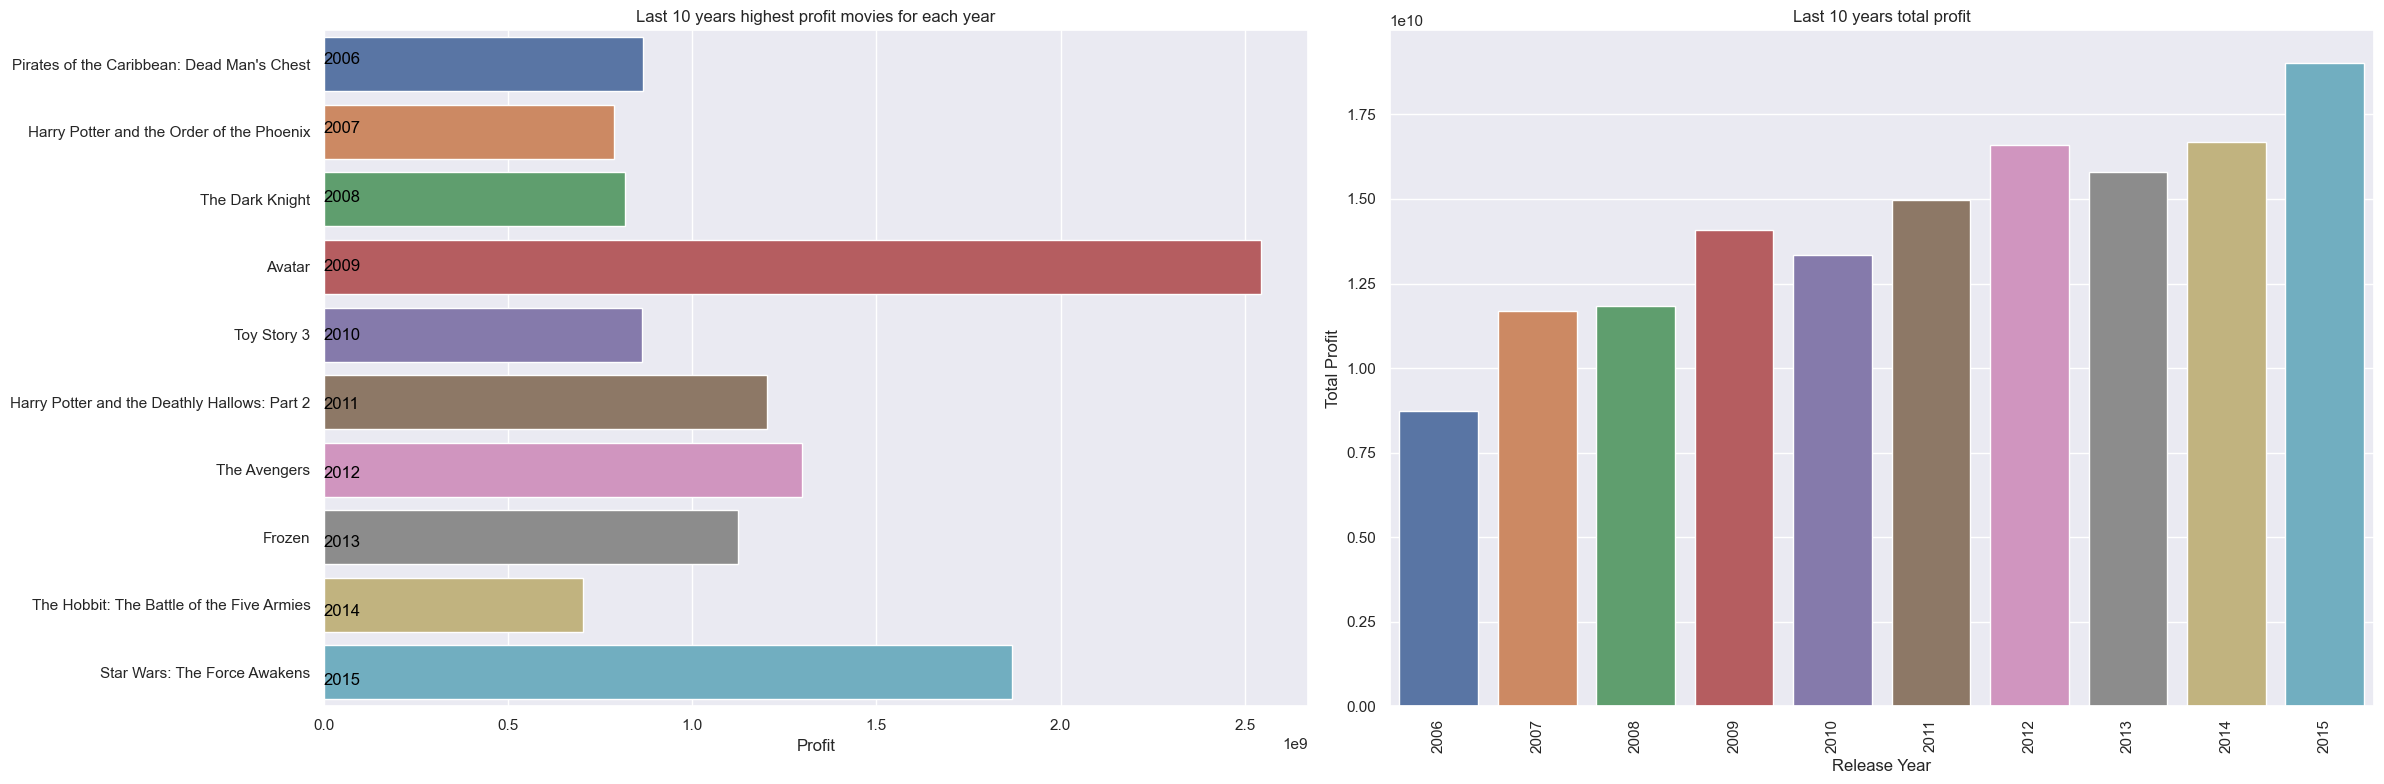

In [418]:
each_year_best(df ,'profit',10)

## ***3.Which movies make it to the top 10 with the highest budget of all time?***
### <span style='color:green'>Answer:</span>
The analysis presents a comprehensive bar chart showcasing the top 10 movies with the highest budget of all time. This visual representation offers a clear and concise overview of the significant financial investments made in these movies, providing valuable insights into the scale of budgetary allocations within the film industry.

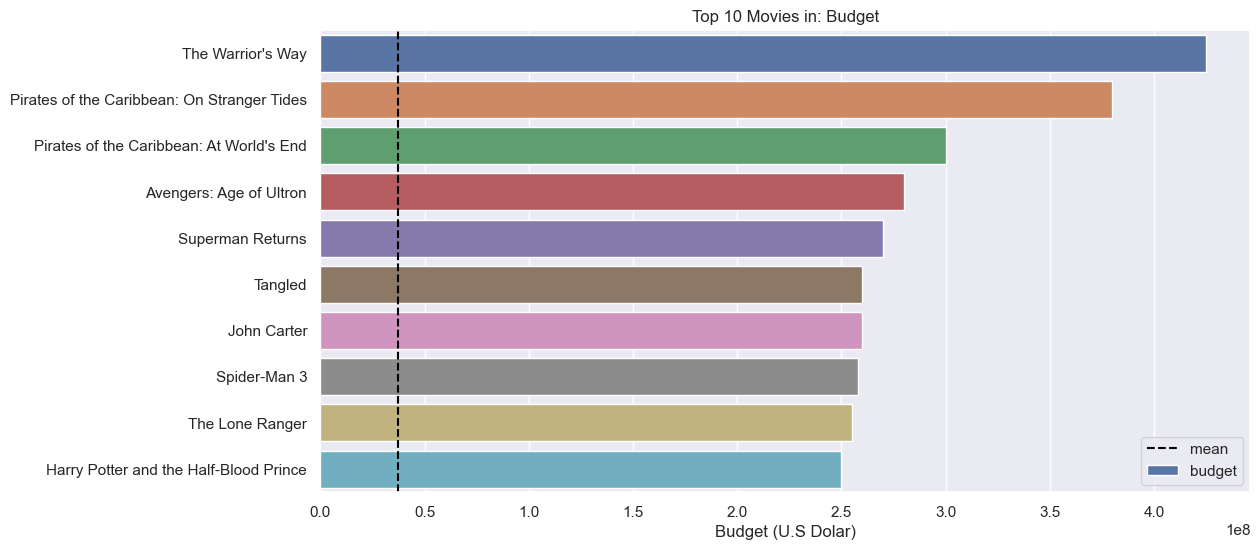

In [419]:
top_10(df ,'budget')

## ***4.Which movie had the highest budget each year, and what is the total budget for every year?***

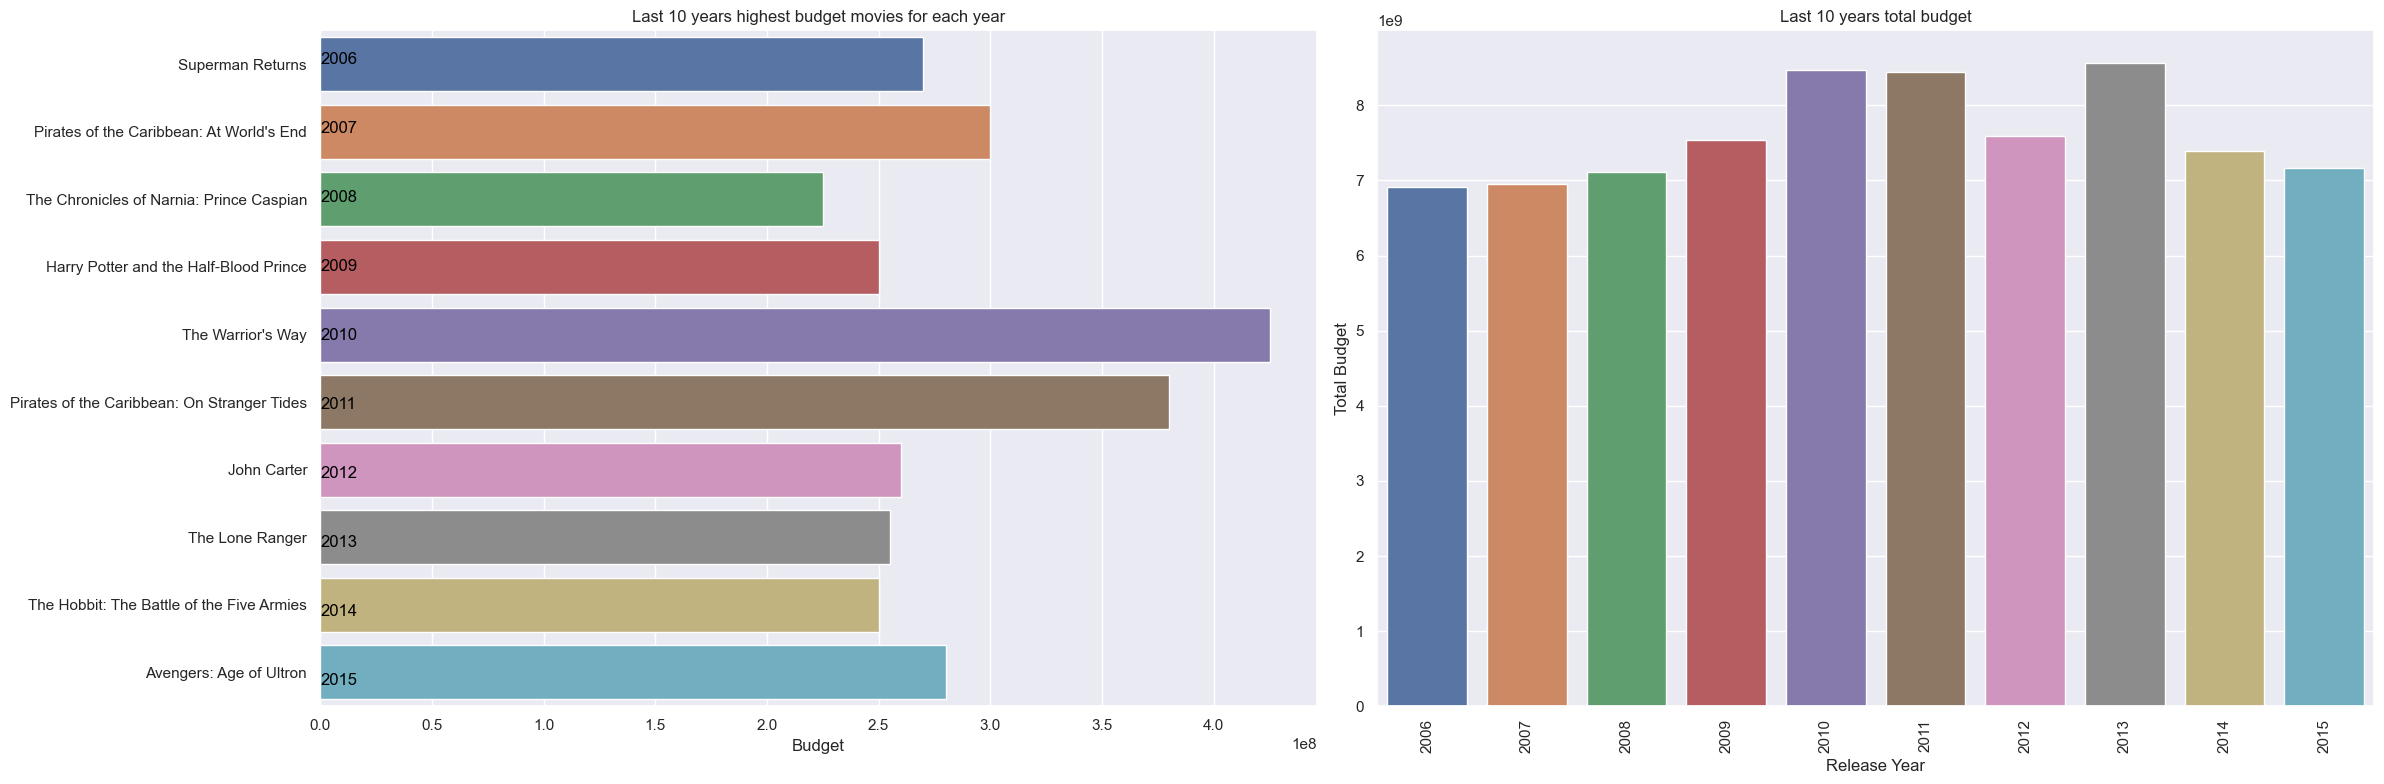

In [420]:
each_year_best(df, 'budget',10)

In [421]:
def split_count_data(col_name, size=15):
    ##function which will take any column as argument from which data is need to be extracted and keep track of count
    #take a given column, and separate the string by '|'
    data = df[col_name].str.cat(sep='|')
    #storing the values separately in the series
    data = pd.Series(data.split('|'))
    #Let's count the most frequenties values for given column
    count = data.value_counts(ascending=False)
    count_size = count.head(size)
    #Setting axis name for multiple names
    if (col_name == 'production_companies'):
        sp = col_name.split('_')
        axis_name = sp[0].capitalize()+' '+ sp[1].capitalize()
    else:
        axis_name = col_name.capitalize()
    fig = plt.figure(figsize=(36, 6))
    #set the subplot 
    gs = gridspec.GridSpec(1,2, width_ratios=[2,2])
    ax0 = plt.subplot(gs[0])
    count_size.plot.barh()
    plt.xlabel('Number of Movies')
    plt.ylabel(axis_name)
    plt.title('The Most '+str(size)+' Filmed ' +axis_name+' Versus Number of Movies')
    
    

## ***5.Which genres were most frequently employed in movies spanning the period from 1960 to 2015?***

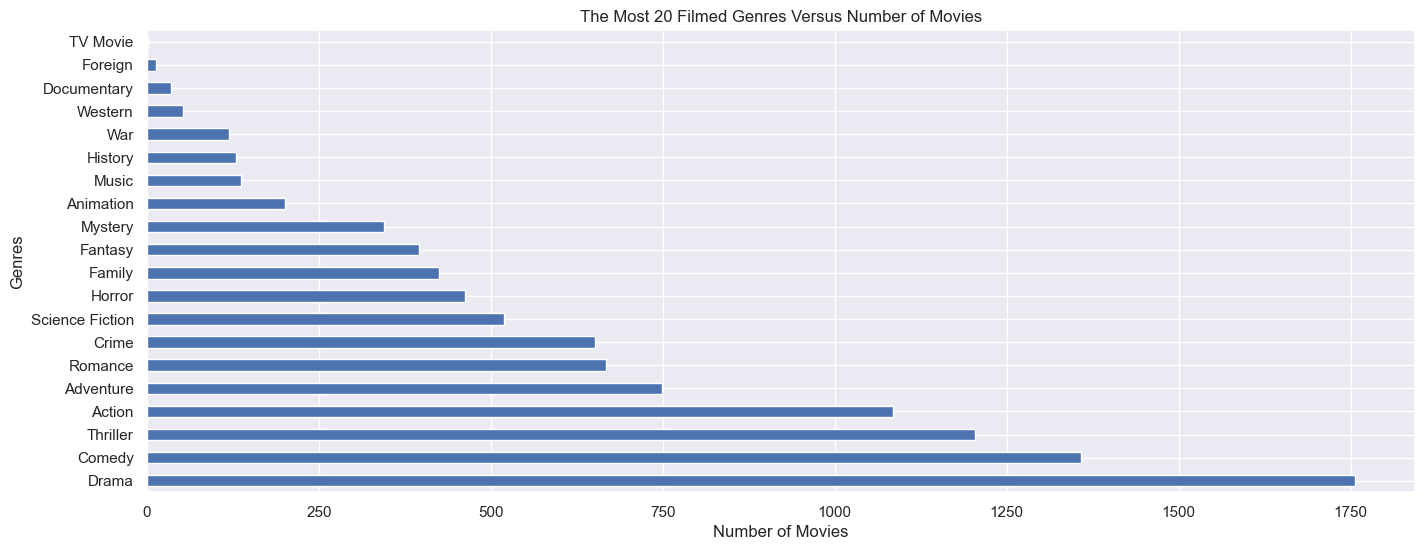

In [422]:
split_count_data('genres',20)                                                

## ***6.Which cast members have been featured in the highest number of films?***

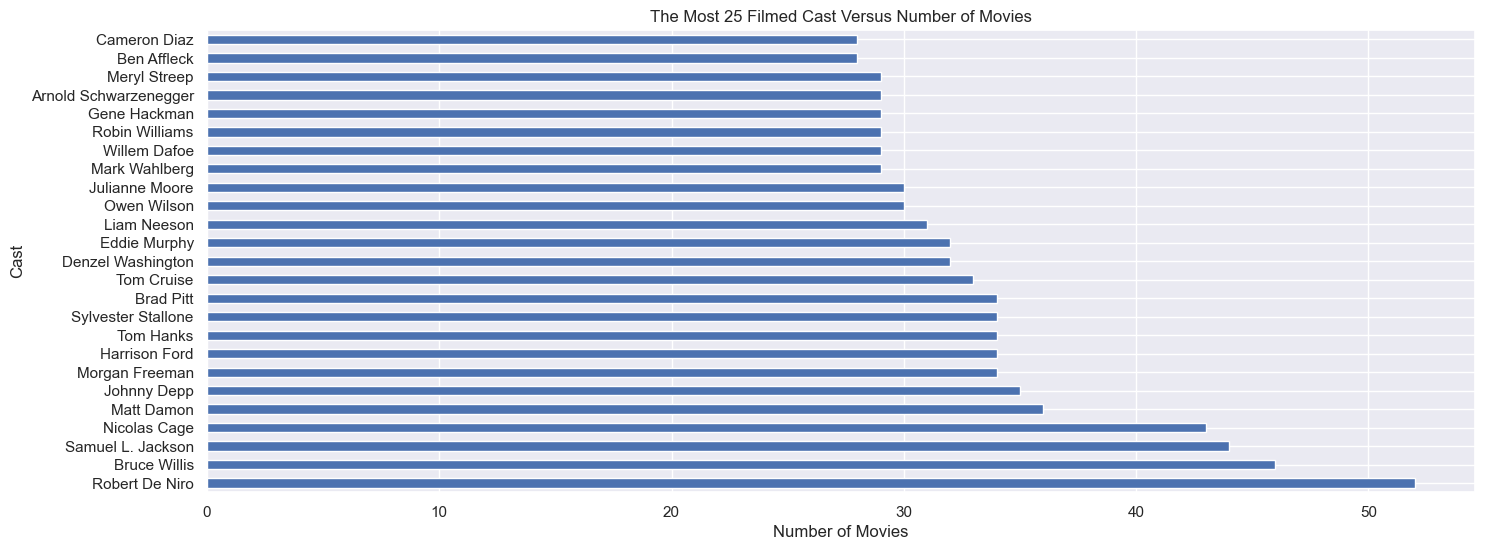

In [423]:
split_count_data('cast', size=25)

## ***7.Which director was most filmed?***

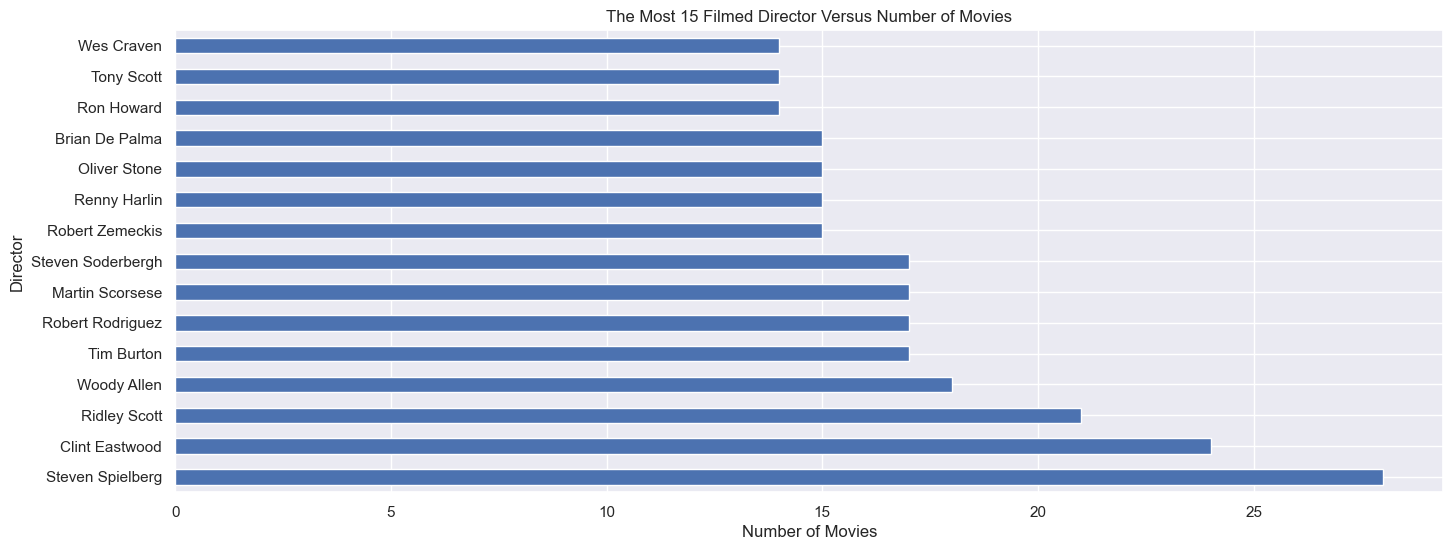

In [424]:
split_count_data('director')

## ***8.Which production companies  were most filmed?***

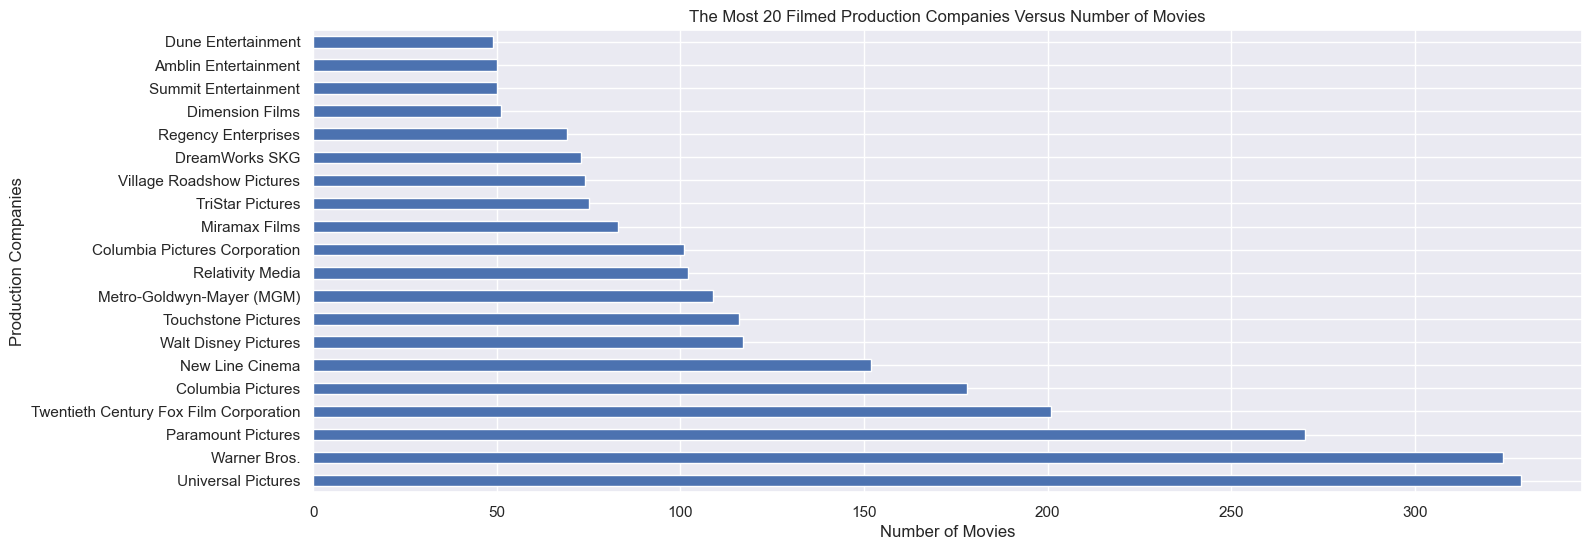

In [425]:
split_count_data('production_companies', size=20)

## ***9.Which pairs of features in the dataset exhibit the strongest correlation?***

c:\Users\natha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


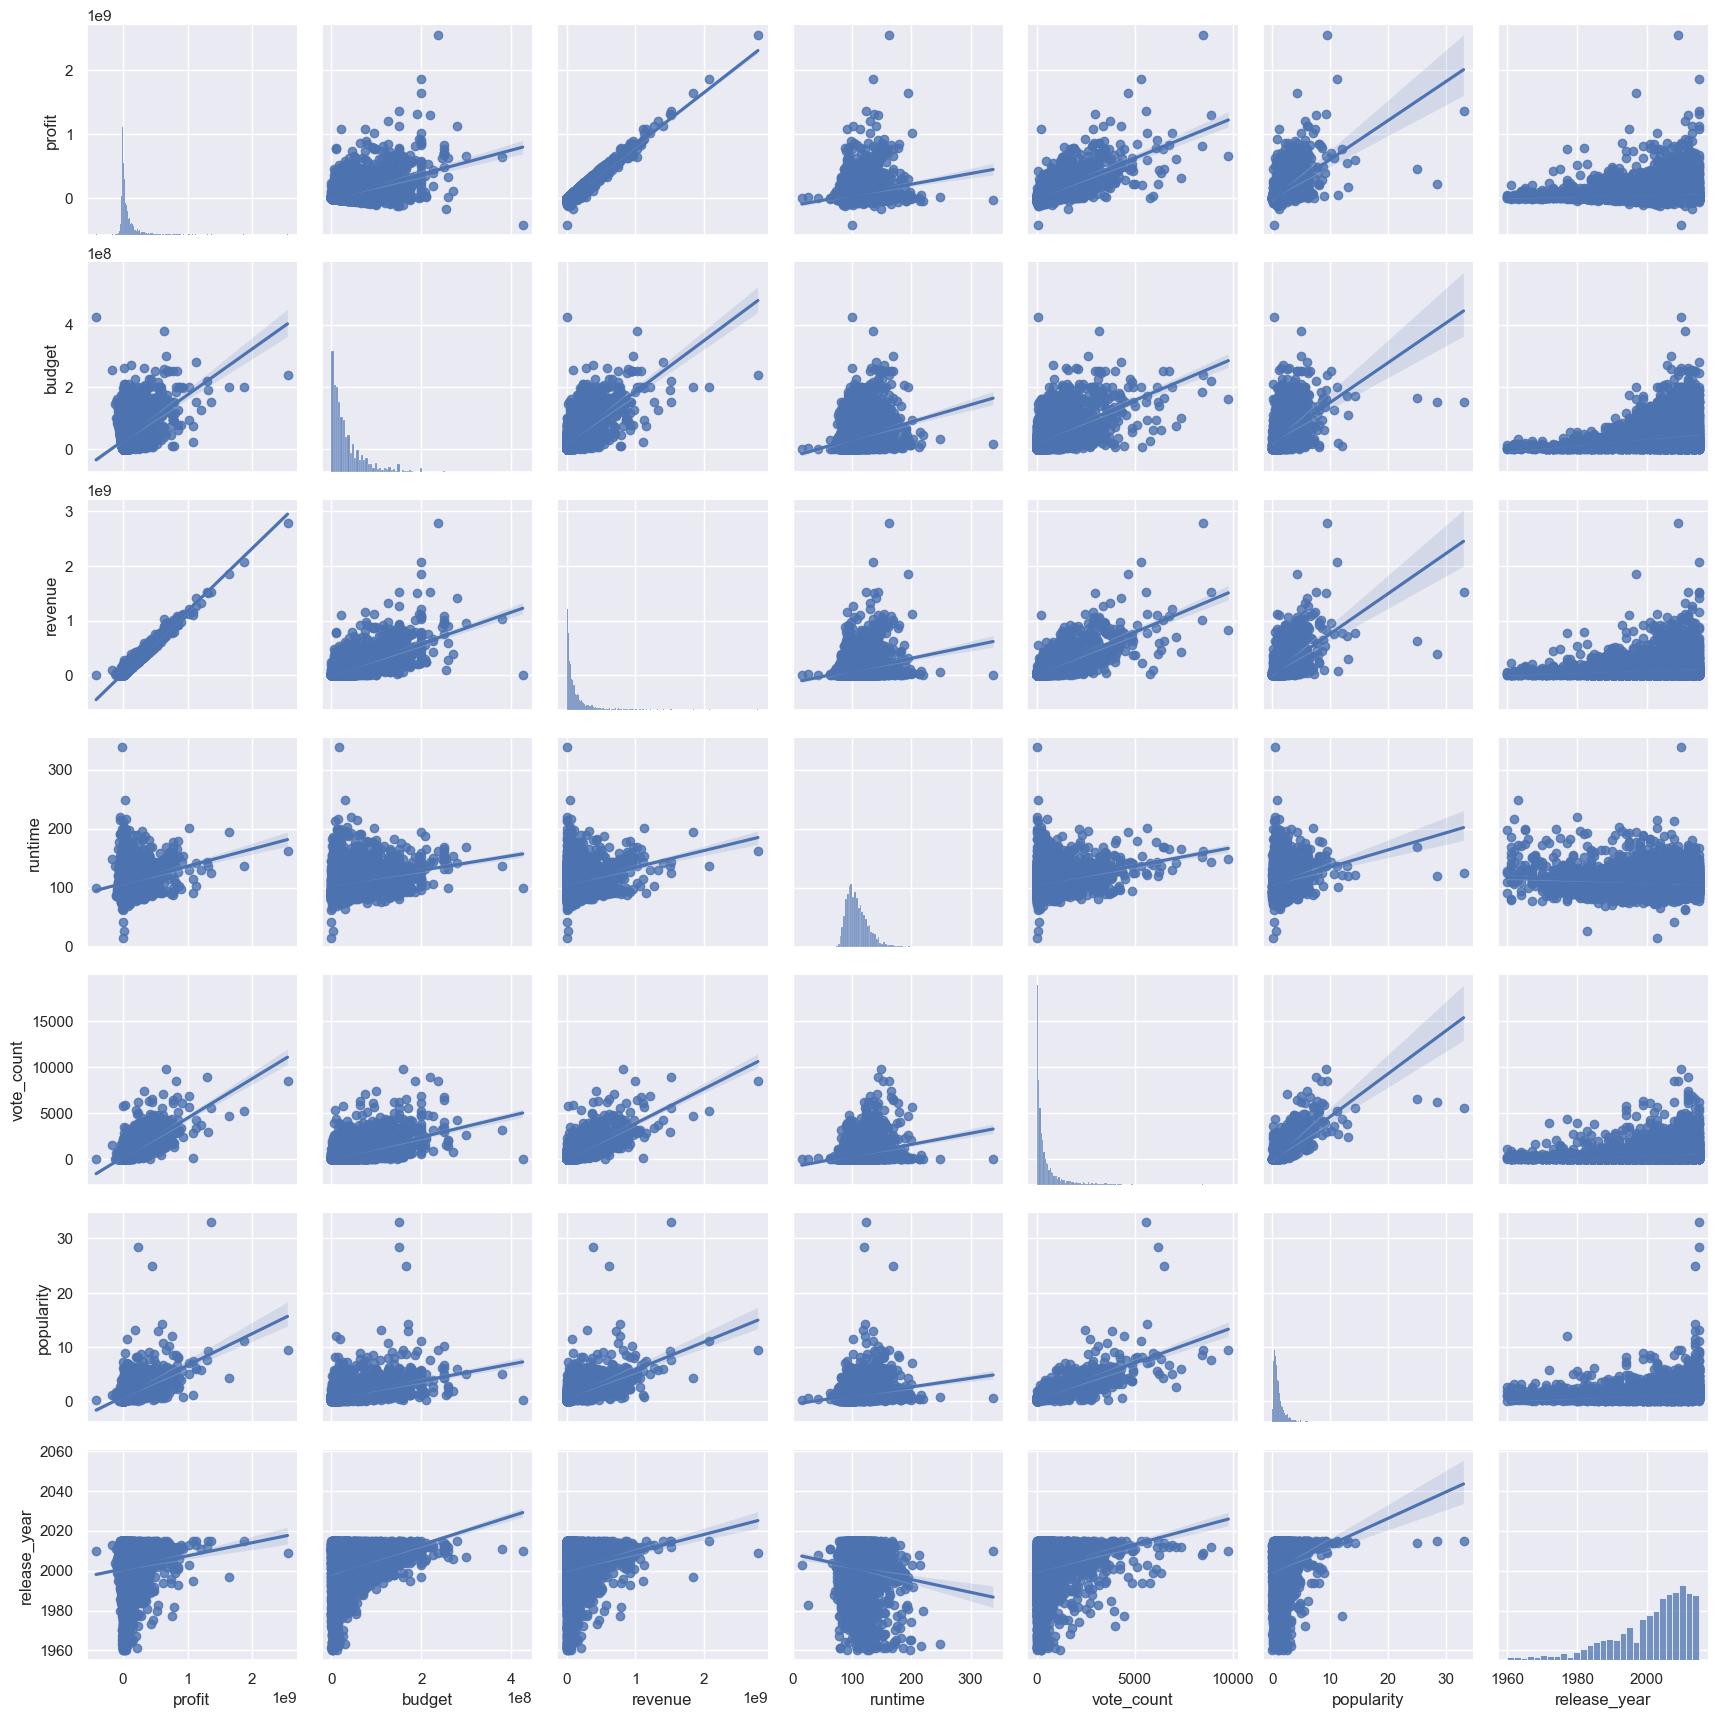

In [426]:
df_related = df[['profit','budget','revenue','runtime', 'vote_count','popularity','release_year']]
sns.pairplot(df_related, kind='reg')

### Correlation between Revenue and Profit
There is a strong positive correlation between profit and revenue. This means that, on average, movies with higher revenues tend to have higher profits.

<Axes: xlabel='revenue', ylabel='profit'>

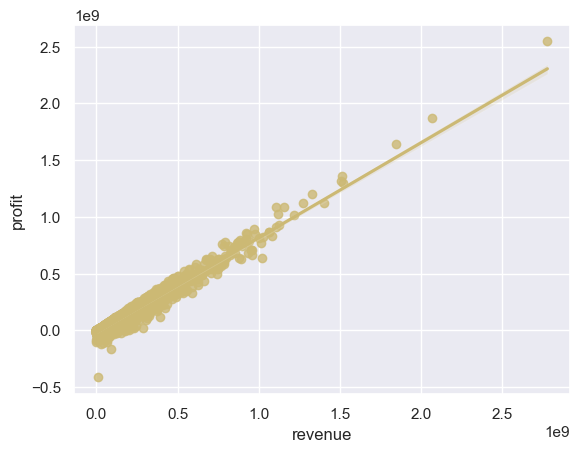

In [427]:
sns.regplot(x=df['revenue'], y=df['profit'],color='y')

## Top 5 Most Correlated Features

In [428]:
def plot_correlation_map( df ):
    corr = df.corr()
    top5_correlations = corr.unstack().sort_values(ascending=False).drop_duplicates().head(6)

    print(top5_correlations[1:])
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, 
                    annot = True, annot_kws = { 'fontsize' : 12 })

profit      revenue       0.979133
popularity  vote_count    0.780096
vote_count  revenue       0.754567
profit      vote_count    0.728348
revenue     budget        0.688556
dtype: float64


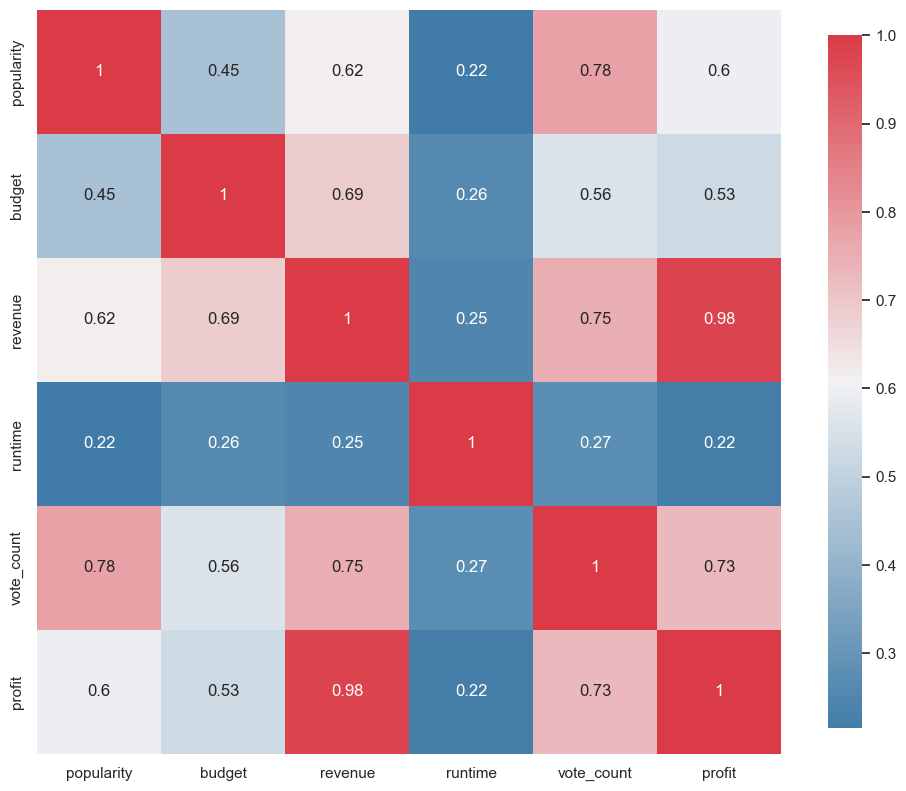

In [429]:
plot_correlation_map(df[['popularity','budget','revenue','runtime','vote_count','profit']])

# 2023 Movie Trend Analysis
In this section, we'll efficiently explore the 2023 movie landscape by following a series of activities utilizing web scraping techniques:

#### Web Scraping for Movie Data:

- Extracting a list of movies from relevant website.
- Gathering comprehensive details, including release dates, genres, and financial metrics.

#### Key Questions and Answers:

- Determining the most-filmed genre in 2023.
- Identifying the film companies with the highest movie count.
- Analyzing which companies generated the most income.

In [430]:
from bs4 import BeautifulSoup
import requests

## Web Scraping for Movie Data


In [431]:
url = 'https://www.the-numbers.com/market/2023/top-grossing-movies'
headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.182 Safari/537.36"}
#get the page from the given url
page = requests.get(url,headers=headers)
soup = BeautifulSoup(page.text, 'html')
soup

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<link href="https://the-numbers.com/images/logo_2021/favicon.ico" rel="icon"/>
<meta content="nofollow, NOARCHIVE, NOODP, NOYDIR" name="robots"/>
<!-- Global site tag (gtag.js) - Google Analytics -->
<!-- Google tag (gtag.js) -->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=G-5K2DT3XQN5"></script>
<script>
                window.dataLayer = window.dataLayer || [];
                function gtag() {
                    dataLayer.push(arguments);
                }
                gtag('js', new Date());

                gtag('config', 'G-5K2DT3XQN5');
            </script>
<!--<script async src="https://www.googletagmanager.com/gtag/js?id=UA-1343128-1"></script>
            <script>
              window.dataLayer = window.dataLayer || [];
              function gtag(){dataLayer.push(arguments);}
              gtag('js', new Date());
            
              gtag('

In [432]:
#Extract the table from the given page
table = soup.find('table')
table

<table>
<tr><th>Rank</th><th>Movie</th><th>Release<br/>Date</th><th>Distributor</th><th>Genre</th><th>2023 Gross</th><th>Tickets Sold</th></tr>
<tr>
<td class="data">1</td>
<td><b><a href="/movie/Barbie-(2023)#tab=summary">Barbie</a></b></td>
<td><a href="/box-office-chart/daily/2023/07/21">Jul 21, 2023</a></td>
<td><a href="/market/distributor/Warner-Bros">Warner Bros.</a></td>
<td><a href="/market/genre/Comedy">Comedy</a></td>
<td class="data">$636,225,983</td>
<td class="data">60,420,321</td>
</tr>
<tr>
<td class="data">2</td>
<td><b><a href="/movie/Super-Mario-Bros-Movie-The-(2022)#tab=summary">The Super Mario Bros. Movie</a></b></td>
<td><a href="/box-office-chart/daily/2023/04/05">Apr 5, 2023</a></td>
<td><a href="/market/distributor/Universal">Universal</a></td>
<td><a href="/market/genre/Action">Action</a></td>
<td class="data">$574,934,330</td>
<td class="data">54,599,651</td>
</tr>
<tr>
<td class="data">3</td>
<td><b><a href="/movie/Spider-Man-Across-the-Spider-Verse-(2023)#t

In [433]:
#Extracting table columns from the table
table_cols = table.find_all('th')
table_cols

[<th>Rank</th>,
 <th>Movie</th>,
 <th>Release<br/>Date</th>,
 <th>Distributor</th>,
 <th>Genre</th>,
 <th>2023 Gross</th>,
 <th>Tickets Sold</th>]

In [434]:
#Extracting columns name from columns
col_titlles = [title.text.strip() for title in table_cols]

print(col_titlles)

['Rank', 'Movie', 'ReleaseDate', 'Distributor', 'Genre', '2023 Gross', 'Tickets Sold']


In [435]:
#creating pandas data frame using the table 
df = pd.DataFrame(columns= col_titlles)
df
table_data = table.find_all('tr')
table_data


for row in table_data[1:-2:]:
    row_data = row.find_all('td')
    single_row_data = [data.text.strip() for data in row_data]
    # print(single_row_data)
    df.loc[len(df)] = single_row_data
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
df

,Rank,Movie,ReleaseDate,Distributor,Genre,2023 Gross,Tickets Sold
0,1,Barbie,"Jul 21, 2023",Warner Bros.,Comedy,"$636,225,983","60,420,321"
1,2,The Super Mario Bros. Movie,"Apr 5, 2023",Universal,Action,"$574,934,330","54,599,651"
2,3,Spider-Man: Across the Spid…,"Jun 2, 2023",Sony Pictures,Adventure,"$381,311,319","36,211,901"
3,4,Guardians of the Galaxy Vol 3,"May 5, 2023",Walt Disney,Action,"$358,995,815","34,092,669"
4,5,Oppenheimer,"Jul 21, 2023",Universal,Drama,"$326,101,370","30,968,791"
...,...,...,...,...,...,...,...
576,577,Christmas Bloody Christmas,"Dec 9, 2022",RLJ Entertainment,Horror,$812,77
577,578,Asedio,"Sep 29, 2023",Sony Pictures,Thriller/Suspense,$684,64
578,579,La marginale,"Sep 22, 2023",Sony Pictures,Drama,$539,51
579,580,Lowndes County and the Road…,"Dec 2, 2022",Greenwich,Documentary,$363,34


In [436]:
def top_20_2023(col_title):
    movies = df[col_title].value_counts()
    top_20 = movies.head(20)

    # Plot the horizontal bar chart for the top 20 distributors with exact movie numbers
    fig, ax = plt.subplots()
    bars = ax.barh(top_20.index, top_20.values)

    # Add exact movie numbers as labels on the bars
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, str(bar.get_width()), ha='left', va='center')

    plt.xlabel('Number of Movies')
    plt.ylabel(col_title)
    if col_title == 'Distributor':
        plt.title('Number of Movies per '+ col_title +' (Top 20)')
    else:
        plt.title('Number of Movies per '+ col_title)
    plt.show()

## *Among the various film production companies, which ones stood out with the highest count of movie releases in 2023?*

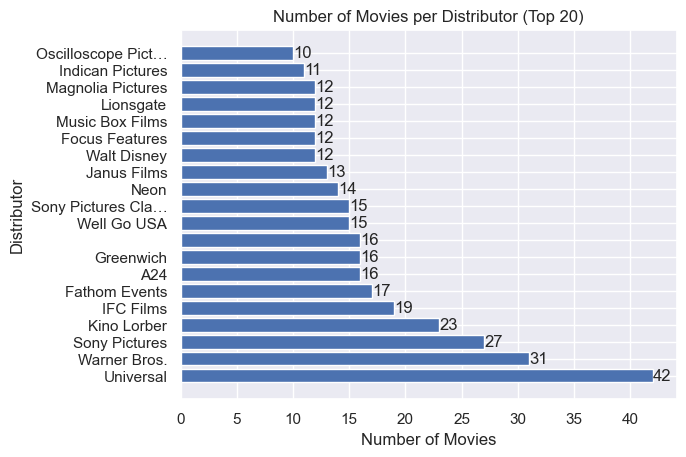

In [437]:
top_20_2023('Distributor')

## *Which genre dominated the film industry in terms of the highest number of movie releases in 2023?*

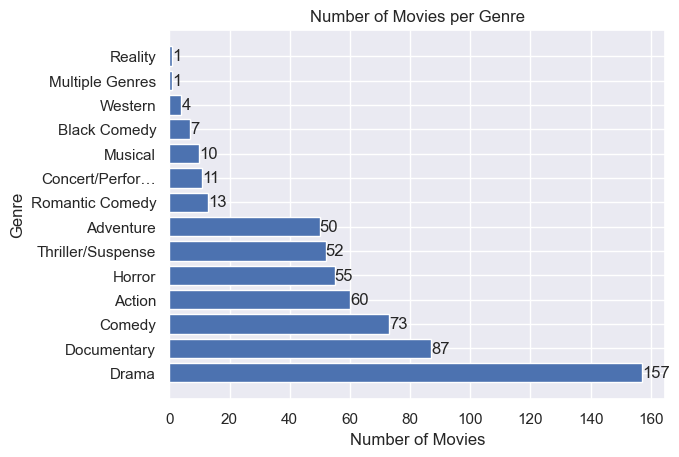

In [438]:
top_20_2023('Genre')

In [439]:
from prettytable import PrettyTable

def top_20_gross_income(col_title):

    # Convert '2023 Gross' to numeric after removing dollar signs and commas
    df['2023 Gross'] = pd.to_numeric(df['2023 Gross'].replace('[\$,]', '', regex=True))
    # Group by genre and calculate the total gross revenue for each genre

    genre_gross = df.groupby(col_title)['2023 Gross'].sum()
    print(type(genre_gross))
    # Create a dictionary with genre names as keys and the sum of gross revenue as values
    genre_sum_dict = genre_gross.sort_values(ascending=False).head(20).to_dict()
    # Print the dictionary with genre sums in a table format
    table = PrettyTable([col_title, 'Total Gross Revenue'])
    for genre, gross in genre_sum_dict.items():
        table.add_row([genre, '${:,.2f}'.format(gross)])
    print(table)
    # Plot the horizontal bar chart for Genre vs Gross
    plt.barh(list(genre_sum_dict.keys()), list(genre_sum_dict.values()))
    plt.xlabel('Total Gross Revenue')
    plt.ylabel('Genre')
    plt.title('Total Gross Revenue per '+col_title)
    plt.show()


## *In terms of revenue generation, which film production companies generated the highest income in 2023?*

<class 'pandas.core.series.Series'>
+----------------------+---------------------+
|     Distributor      | Total Gross Revenue |
+----------------------+---------------------+
|      Universal       |  $1,831,838,454.00  |
|     Walt Disney      |  $1,445,018,389.00  |
|     Warner Bros.     |  $1,413,100,615.00  |
|    Sony Pictures     |   $981,803,064.00   |
|  Paramount Pictures  |   $844,379,150.00   |
|      Lionsgate       |   $579,712,250.00   |
| 20th Century Studios |   $409,558,232.00   |
|         MGM          |   $221,105,129.00   |
|    Angel Studios     |   $219,664,985.00   |
|  AMC Theatres Dist…  |   $213,784,152.00   |
|         A24          |   $138,140,025.00   |
|    Focus Features    |   $116,773,965.00   |
|    Amazon Studios    |    $68,449,546.00   |
|    Yash Raj Films    |    $47,715,688.00   |
|  Toho International  |    $45,580,412.00   |
|    Fathom Events     |    $45,451,264.00   |
|        GKIDS         |    $37,549,611.00   |
|         Neon         |

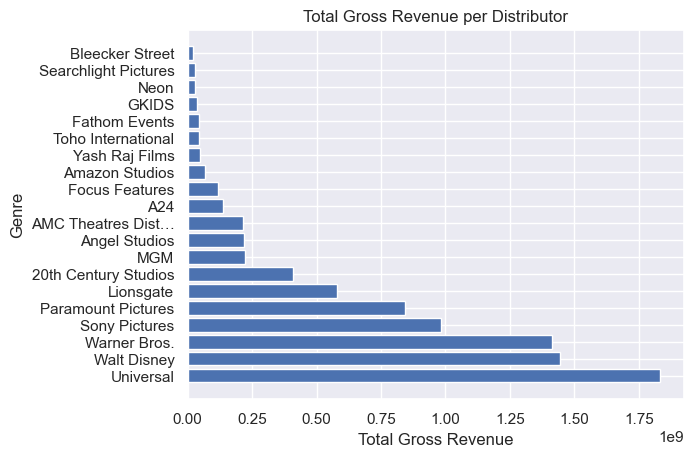

In [440]:
top_20_gross_income('Distributor')

## *Which film genre contributed the most to revenue generation in 2023, showcasing the intersection of popularity and financial success?*

<class 'pandas.core.series.Series'>
+-------------------+---------------------+
|       Genre       | Total Gross Revenue |
+-------------------+---------------------+
|       Action      |  $3,044,543,197.00  |
|     Adventure     |  $1,829,625,328.00  |
|       Comedy      |  $1,130,745,911.00  |
|       Drama       |   $915,664,436.00   |
|       Horror      |   $901,961,438.00   |
| Thriller/Suspense |   $436,985,060.00   |
|  Concert/Perfor…  |   $226,748,768.00   |
|      Musical      |   $196,798,857.00   |
|    Black Comedy   |    $90,595,595.00   |
|  Romantic Comedy  |    $86,336,712.00   |
|      Western      |    $68,456,018.00   |
|    Documentary    |    $37,094,029.00   |
|  Multiple Genres  |    $3,023,866.00    |
|      Reality      |      $5,393.00      |
+-------------------+---------------------+


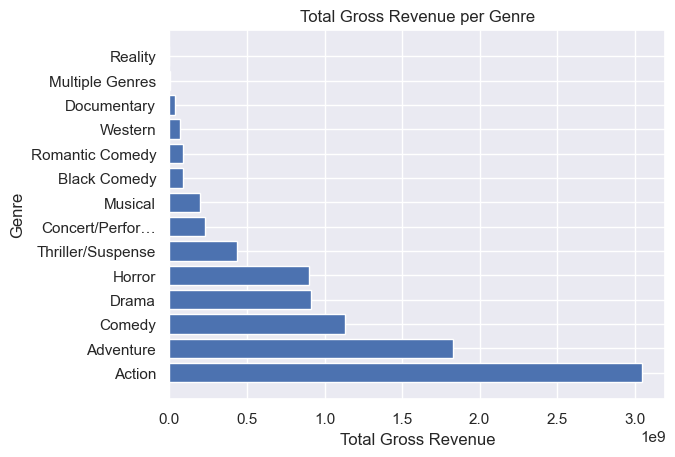

In [441]:
top_20_gross_income('Genre')